In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
%matplotlib inline

In [16]:
def draw(X, Y, D1, R1):
    plt.figure(figsize=(10,6))
    ND = np.linspace(0, 3*np.pi/2, 100)
    plt.plot(ND, np.sin(ND), color="red", lw=3, label = "$sin(x)$")
    plt.plot(X, Y, color="blue", label = "$estim$")
    plt.plot(D1, R1, "o", color="black", label = "$d$")
    plt.grid(True)
    plt.axis([-0.1, 3*np.pi/2+0.1, -1.1, 1.1])
    plt.legend()
    plt.show()

In [103]:
a = np.array([1, 2, 3]).reshape(3, 1)
b = np.array([4, 5, 6])
c = np.array([7, 8, 9])
b = np.hstack((a, a**2))
np.hstack((b, a))

array([[1, 1, 1],
       [2, 4, 2],
       [3, 9, 3]])

[-0.35722992]
[ 1.09948493  1.08248082  1.06547672  1.04847261  1.03146851  1.01446441
  0.9974603   0.9804562   0.96345209  0.94644799  0.92944388  0.91243978
  0.89543567  0.87843157  0.86142747  0.84442336  0.82741926  0.81041515
  0.79341105  0.77640694  0.75940284  0.74239873  0.72539463  0.70839053
  0.69138642  0.67438232  0.65737821  0.64037411  0.62337     0.6063659
  0.5893618   0.57235769  0.55535359  0.53834948  0.52134538  0.50434127
  0.48733717  0.47033306  0.45332896  0.43632486  0.41932075  0.40231665
  0.38531254  0.36830844  0.35130433  0.33430023  0.31729612  0.30029202
  0.28328792  0.26628381  0.24927971  0.2322756   0.2152715   0.19826739
  0.18126329  0.16425919  0.14725508  0.13025098  0.11324687  0.09624277
  0.07923866  0.06223456  0.04523045  0.02822635  0.01122225 -0.00578186
 -0.02278596 -0.03979007 -0.05679417 -0.07379828 -0.09080238 -0.10780649
 -0.12481059 -0.14181469 -0.1588188  -0.1758229  -0.19282701 -0.20983111
 -0.22683522 -0.24383932 -0.26084342 -

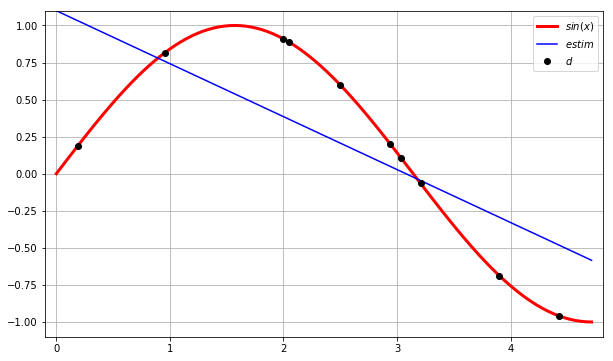

In [98]:
X = np.random.uniform(0, 3*np.pi/2, 10)
Y = np.sin(X)
lr = LinearRegression()
lr.fit(X.reshape(10, 1), Y)
print(lr.coef_)
ND = np.linspace(0, 3*np.pi/2, 100)
print(lr.predict(ND.reshape(100, 1)))
draw(ND, lr.predict(ND.reshape(100, 1)), X, Y)

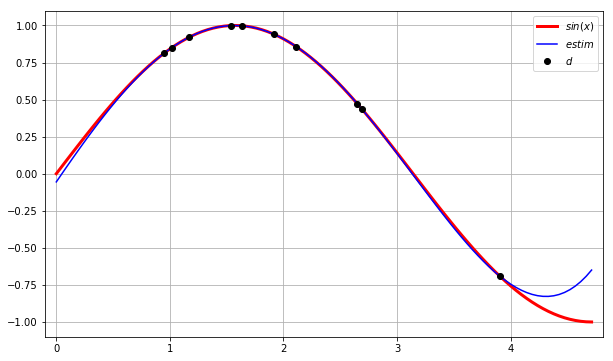

0.004909658427741246

In [17]:
X = np.random.uniform(0, 3*np.pi/2, 10)
Y = np.sin(X)
lr = LinearRegression()
lr.fit(np.column_stack((X, X**2, X**3, X**4)), Y)
ND = np.linspace(0, 3*np.pi/2, 100)
draw(ND, lr.predict(np.column_stack((ND, ND**2, ND**3, ND**4))), X, Y)
mean_squared_error(np.sin(ND), lr.predict(np.column_stack((ND, ND**2, ND**3, ND**4))))

In [3]:
def FUNC(x): return np.sin(4*x)

In [5]:
a = np.arange(9).reshape(9, 1)
b = np.empty((9, 1))
np.hstack((b, a))

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 0.,  3.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 0.,  6.],
       [ 0.,  7.],
       [ 0.,  8.]])

In [4]:
def linr(a, b, n_f, n_obj, n_test, sd, f):
    X, GRID = np.random.uniform(a, b, n_obj), np.linspace(a, b, n_test)
    Dset, TestD, Y, VAL = np.ones((n_obj, 1)), np.ones((n_test, 1)), f(X)+np.random.normal(0, sd, n_obj), f(GRID)+np.random.normal(0, sd, n_test)
    DEG, RMSEScores, Bias, Var = np.arange(0, n_f+1, 1), np.empty(n_f+1), np.empty(n_f+1), np.empty(n_f+1)
    lr = LinearRegression()
    lr.fit(Dset, Y)
    RES = lr.predict(TestD)
    RES_MEAN = np.mean(RES)
    RMSEScores[0], Bias[0], Var[0] = sqrt(mean_squared_error(VAL, RES)), sum(VAL-RES)/n_test, sum((RES-RES_MEAN)**2)/(n_test-1)
    plt.figure(figsize=(16,8))
    plt.plot(GRID, RES, label="$0deg$")
    for i in range(1, n_f+1): 
        Dset, TestD = np.hstack((Dset, (X.reshape(n_obj, 1))**i)), np.hstack((TestD, (GRID.reshape(n_test, 1))**i))
        lr.fit(Dset, Y)
        RES = lr.predict(TestD)
        RES_MEAN = np.mean(RES)
        RMSEScores[i], Bias[i], Var[i] = sqrt(mean_squared_error(VAL, RES)), sum(VAL-RES)/n_test, sum((RES-RES_MEAN)**2)/(n_test-1)
        plt.plot(GRID, RES, label=str(i)+"$deg$")
    plt.plot(GRID, f(GRID), color="red", lw=3, label="$func$")
    plt.plot(X, Y, "o", color="black", label="$data$")
    plt.title('Approximation', fontsize=20)
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$y$', fontsize=20)
    plt.grid(True)
    plt.axis([a-0.1, b+0.1, -1.1, 1.1])
    plt.legend()
    plt.show()
    
    plt.plot(DEG, Bias**2, label="$bias$")
    plt.plot(DEG, Var, label="$Var$")
    plt.plot(DEG, RMSEScores, label="$RMSE$")
    plt.title('Errors')
    plt.xlabel('$polynomdeg$')
    plt.ylabel('$err$')
    plt.grid(True)
    plt.axis([-0.1, n_f+0.1, -1.0, 2.0])
    plt.legend()
    plt.show()

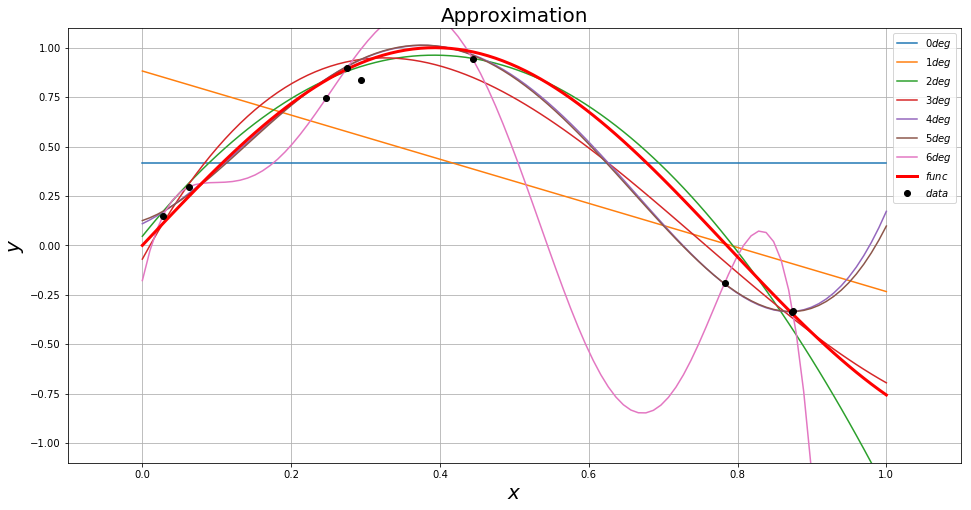

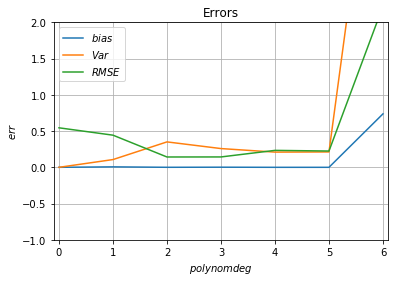

In [5]:
linr(0, 1, 6, 10, 100, 0.1, FUNC)

In [3]:
for i in range(1, 3): print(i)

1
2


In [11]:
Gr = np.arange(0, 7)
np.delete(Gr, [2, 4])

array([0, 1, 3, 5, 6])

In [27]:
def PolTrendTS(COEF, T, mean=0, std=1):
    T_GRID, TREND, TS = np.arange(0, T+1), np.empty(T+1), np.empty(T+1)
    for i in range(T+1):
        TREND[i] = sum([COEF[j]*T_GRID[i]**j for j in range(len(COEF))])
        TS[i]=TREND[i]+np.random.normal(mean, std)
    FDF_TS = [TS[i]-TS[i-1] for i in range(1, T+1)]
    SDF_TS = [FDF_TS[i]-FDF_TS[i-1] for i in range(1, T)]
    plt.figure(figsize=(16,8))
    plt.plot(T_GRID, TS, color="red", label="$TS$")
    plt.plot(T_GRID, TREND, "k--", color="black", label="$TREND$")
    plt.title('Polynomial_Trend_TimeSeries')
    plt.xlabel('$t$')
    plt.ylabel('$X_t$')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.figure(figsize=(16,8))
    plt.plot(np.delete(T_GRID, 0), FDF_TS, "k--", color="red", label="$FirstDiffTS$")
    plt.title('FirstDiffTS')
    plt.xlabel('$t$')
    plt.ylabel('$\Delta X_t$')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.figure(figsize=(16,8))
    plt.plot(np.delete(T_GRID, [0, 1]), SDF_TS, "k--", color="red", label="$SecondDiffTS$")
    plt.title('SecondDiffTS')
    plt.xlabel('$t$')
    plt.ylabel('$\Delta^2 X_t$')
    plt.grid(True)
    plt.legend()
    plt.show()

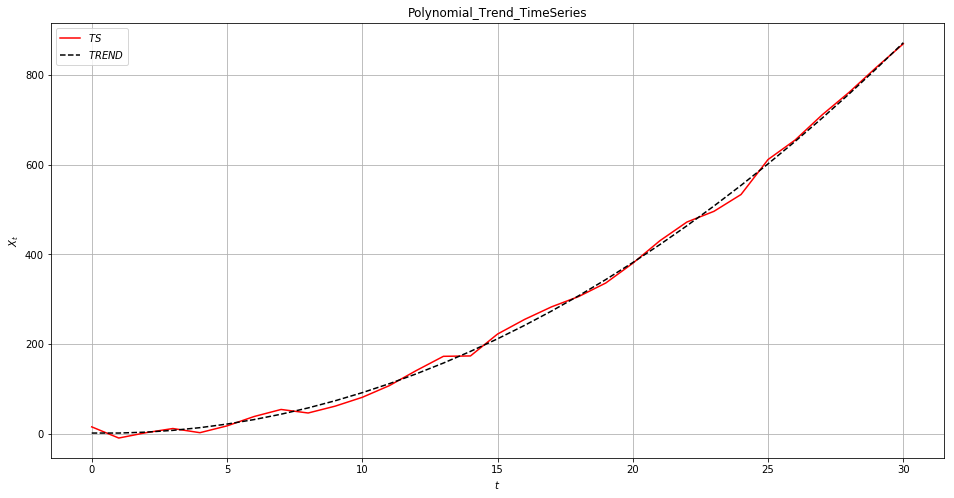

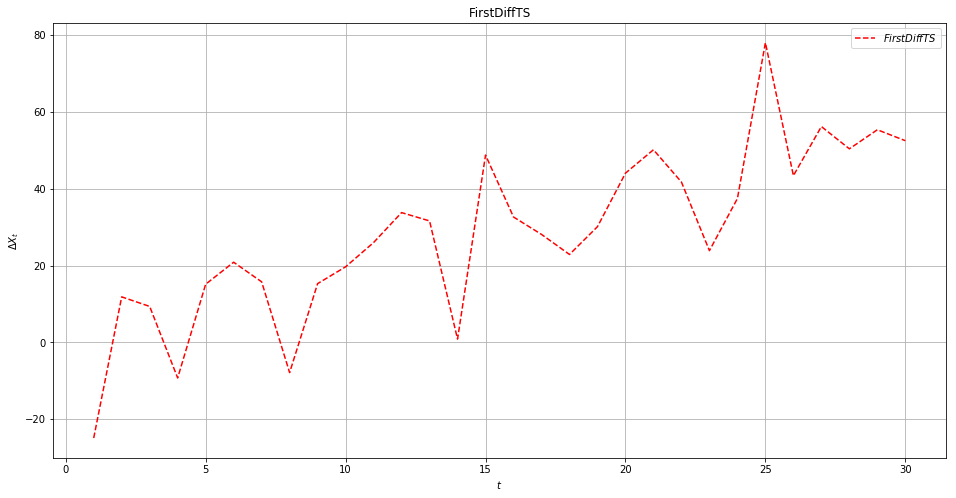

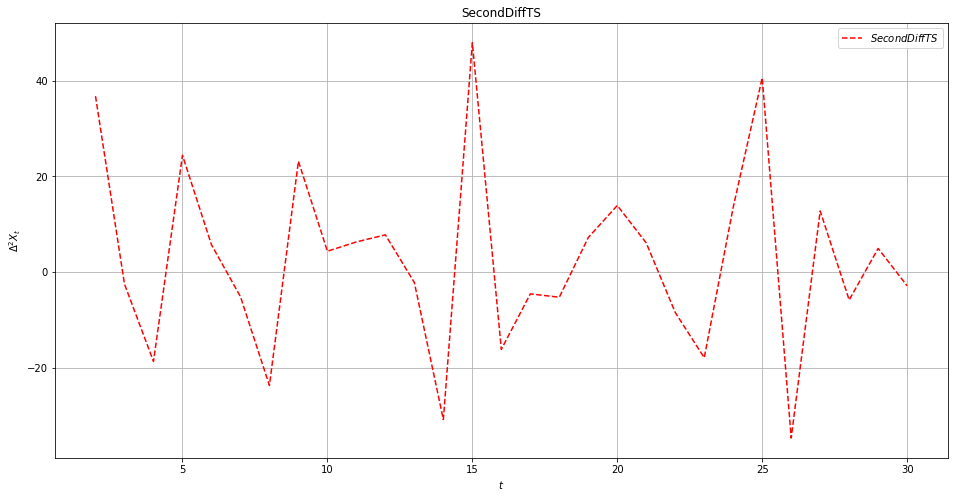

In [30]:
PolTrendTS([2.0, -1.0, 1.0], 30, 0.0, 10.0)